In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import *

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val  = train_test_split(x_train,y_train,test_size=0.10,random_state=1)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(54000, 28, 28)
(10000, 28, 28)
(6000, 28, 28)


In [7]:
x_train = x_train.reshape(54000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_val = x_val.reshape(6000,28,28,1)

In [9]:
print(x_train.min())
x_val.max()

0


255

In [10]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [11]:
print(x_train.min(),x_train.max())
print(x_test.min(),x_test.max())
print(x_val.min(),x_val.max())

0.0 1.0
0.0 1.0
0.0 1.0


In [21]:
model = tf.keras.models.Sequential()

model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu',input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(13, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))




In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                  

In [24]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [25]:
history  = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6667 - accuracy: 0.7671 - val_loss: 0.4340 - val_accuracy: 0.8472
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3620 - accuracy: 0.8697 - val_loss: 0.3493 - val_accuracy: 0.8735
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3011 - accuracy: 0.8914 - val_loss: 0.3196 - val_accuracy: 0.8822
Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2678 - accuracy: 0.9027 - val_loss: 0.2893 - val_accuracy: 0.8992
Epoch 5/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2446 - accuracy: 0.9120 - val_loss: 0.2850 - val_accuracy: 0.8965
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2246 - accuracy: 0.9184 - val_loss: 0.2599 - val_accuracy: 0.9072
Epoch 7/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2078 - accuracy: 0.9234 - val_loss: 0.2626 - val_accur

In [27]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

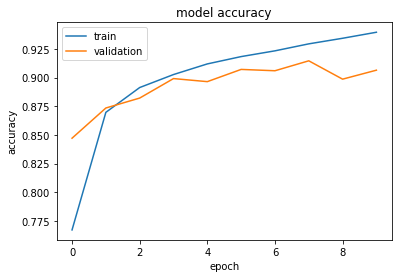

In [28]:
plot_hist(history)

In [29]:
def plot_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

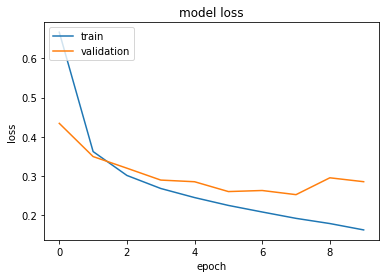

In [30]:
plot_loss(history)

In [57]:
model.save("model.hdf5")

In [35]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3077 - accuracy: 0.9008


[0.30771538615226746, 0.9007999897003174]